<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/Puyo_Puyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Puyo Puyo

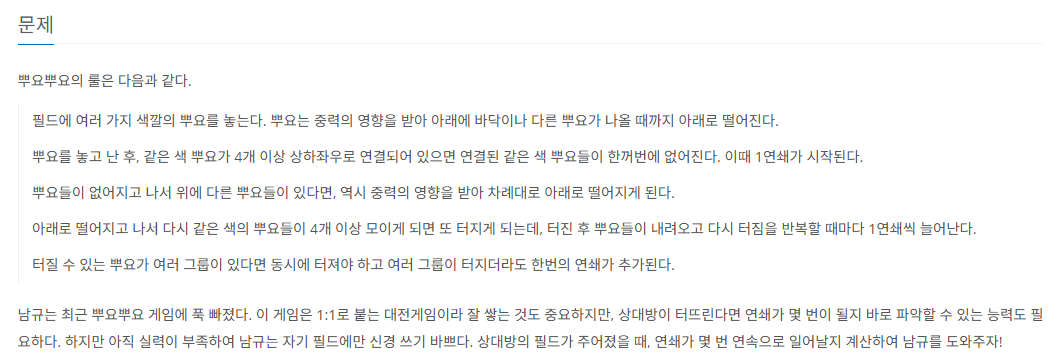

## 입력 출력 및 예제


* 입력

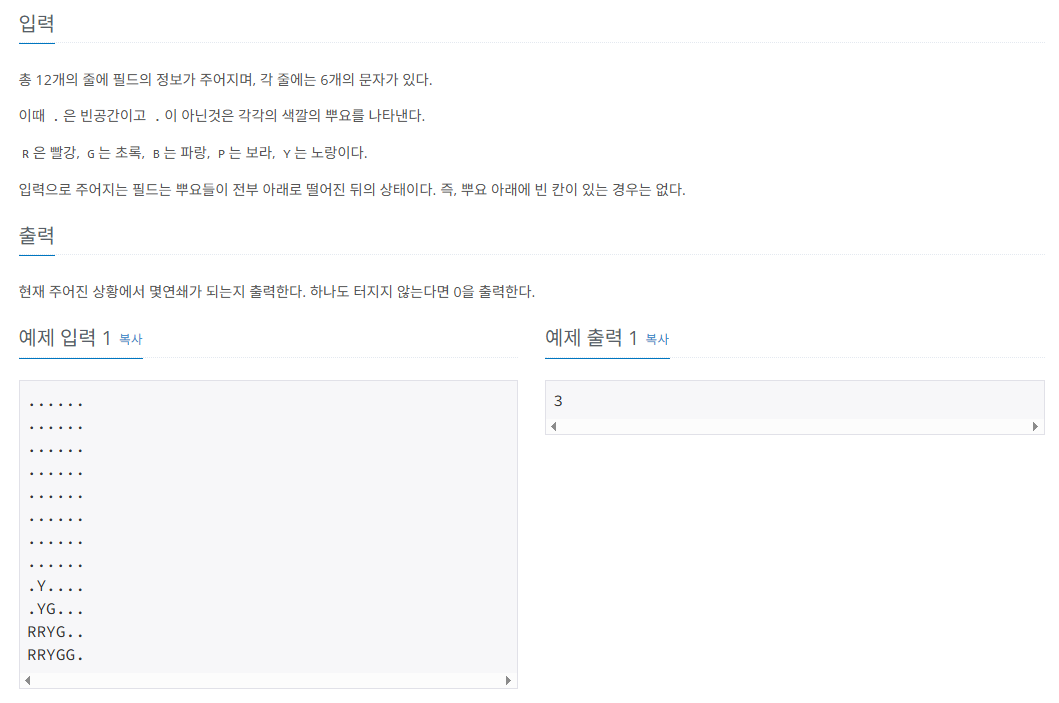

* 출력

* 예제

## 구상

- 1. dfs 이용해서, 같은 색깔의 뿌요가 4곳 이상 연결되어 있으면 +1 이후 해당 칸 0
- 2. 0이 된 칸 고려해서 뿌요 떨어뜨리고 1 반복


## 코드

In [1]:
# GPT

R, C = 12, 6
board = [list(input().rstrip()) for _ in range(R)]
dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def collect_component(sr, sc, visited):
    """(sr, sc)에서 같은 색 연결 컴포넌트를 스택 DFS로 모아 좌표 리스트 반환"""
    color = board[sr][sc]
    stack = [(sr, sc)]
    visited[sr][sc] = True
    comp = [(sr, sc)]

    while stack:
        r, c = stack.pop()
        for dr, dc in dirs:
            nr, nc = r + dr, c + dc
            if 0 <= nr < R and 0 <= nc < C:
                if not visited[nr][nc] and board[nr][nc] == color:
                    visited[nr][nc] = True
                    stack.append((nr, nc))
                    comp.append((nr, nc))
    return comp

def apply_gravity(): # 읽는 위치 r, 쓰는 위치 w(write)를 따로 두어서. 맨 밑에서부터 "." 이면 w 변화 없이 넘어간다(r 변화). 그러다 뿌요를 발견하면 쓰는 위치(처음에는 당연히 맨 밑)에 넣어주고, 쓰는 위치 변경해주고.
    """각 열마다 아래로 떨어뜨리기"""
    for c in range(C):
        write = R - 1
        # 아래에서 위로 보면서 뿌요를 아래로 모음
        for r in range(R - 1, -1, -1):
            if board[r][c] != '.':
                board[write][c] = board[r][c]
                # 앞에서 공백이 발생하여 r, w 위치가 달라졌을 경우
                # 해당 뿌요를 w 위치(공백없이 아래로 채운)에 쓰고 읽은 위치를 공백 처리
                # 중간에 공백이 있었으면 r, w는 당연히 다를 수 밖에 없다. 우리의 목적은 아래에서부터 빈틈없이 채워넣는것.
                if write != r:
                    board[r][c] = '.'
                write -= 1
        # 남은 윗칸은 '.'로 # 안정 장치. 이 경우 위에서 처리해주어서 굳이 없어도 됨
        for r in range(write, -1, -1):
            board[r][c] = '.'

chain = 0

while True:
    visited = [[False] * C for _ in range(R)]
    to_pop = []

    for i in range(R):
        for j in range(C):
            if board[i][j] != '.' and not visited[i][j]:
                comp = collect_component(i, j, visited)
                if len(comp) >= 4:
                    to_pop.extend(comp)

    if not to_pop:
        break

    # 동시에 터뜨리기
    for r, c in to_pop:
        board[r][c] = '.'

    apply_gravity()
    chain += 1

print(chain)


......
......
......
......
......
......
......
......
.Y....
.YG...
RRYG..
RRYGG.
comp: [(8, 1), (9, 1)]
comp: [(9, 2)]
comp: [(10, 0), (11, 0), (10, 1), (11, 1)]
comp: [(10, 2), (11, 2)]
comp: [(10, 3), (11, 3), (11, 4)]
comp: [(9, 2)]
comp: [(10, 1), (11, 1), (10, 2), (11, 2)]
comp: [(10, 3), (11, 3), (11, 4)]
comp: [(10, 3), (11, 3), (11, 2), (11, 4)]
3


In [2]:
H, W = 12, 6
graph = []
for _ in range(H):
    graph.append(input())

print(graph)


......
......
......
......
......
......
......
......
.Y....
.YG...
RRYG..
RRYGG.
['......', '......', '......', '......', '......', '......', '......', '......', '.Y....', '.YG...', 'RRYG..', 'RRYGG.']


In [3]:
graph[::-1]

['RRYGG.',
 'RRYG..',
 '.YG...',
 '.Y....',
 '......',
 '......',
 '......',
 '......',
 '......',
 '......',
 '......',
 '......']

In [5]:
graph[11][2]

'Y'

In [ ]:
def dfs(x,y,g):
    dirs = [(-1,0), (1,0), (0,-1), (0,1)]


### 메모
- 뿌요 떨어뜨리며 아래로 채우는 작업은 "배열 압축(compaction)"


*